# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [29]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={'metric'}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | lib
Processing Record 5 of Set 1 | daru
Processing Record 6 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 7 of Set 1 | eruh
Processing Record 8 of Set 1 | quellon
Processing Record 9 of Set 1 | brookings
Processing Record 10 of Set 1 | alotau
City not found. Skipping...
Processing Record 11 of Set 1 | dudinka
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | sanya
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | lebu
Processing Record 17 of Set 1 | west island
Processing Record 18 of Set 1 | sisimiut
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 o

In [30]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [31]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,26.35,74,99,0.16,PN,1708924268
1,punta arenas,-53.1500,-70.9167,11.06,87,75,1.54,CL,1708924608
2,uturoa,-16.7333,-151.4333,28.77,78,46,5.19,PF,1708924608
3,lib,8.3122,167.3766,27.69,81,22,6.67,MH,1708924609
4,daru,-9.0763,143.2092,30.16,74,57,1.49,PG,1708924609


In [32]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [33]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,26.35,74,99,0.16,PN,1708924268
1,punta arenas,-53.1500,-70.9167,11.06,87,75,1.54,CL,1708924608
2,uturoa,-16.7333,-151.4333,28.77,78,46,5.19,PF,1708924608
3,lib,8.3122,167.3766,27.69,81,22,6.67,MH,1708924609
4,daru,-9.0763,143.2092,30.16,74,57,1.49,PG,1708924609


In [34]:
#Convert timestamp to date
timestamp = datetime.datetime.fromtimestamp(city_data_df.iloc[0, 8])
date = timestamp.strftime('%Y-%m-%d')

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

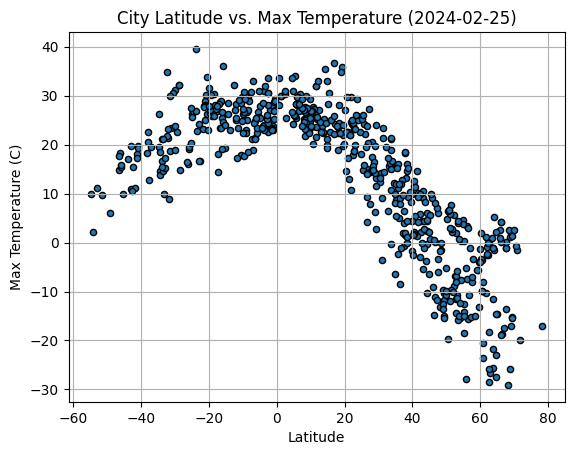

In [35]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1_lms.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

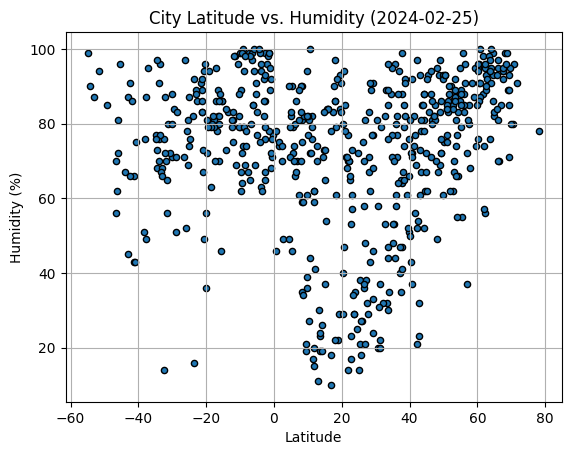

In [37]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2_lms.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

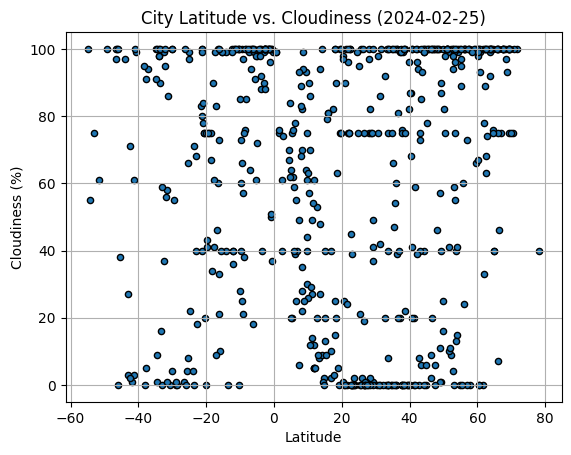

In [38]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")


# Save the figure
plt.savefig("output_data/Fig3_lms.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

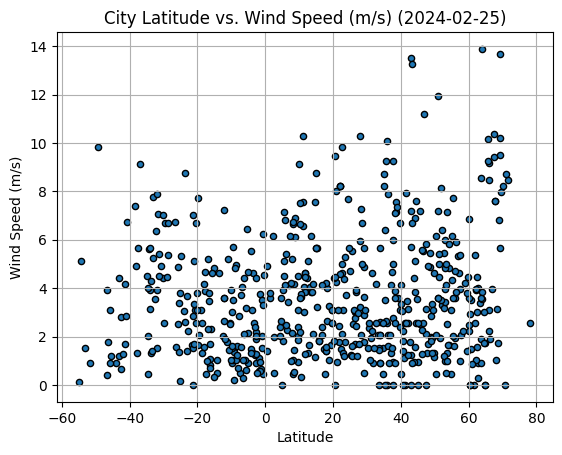

In [40]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', edgecolors='black', grid=True)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed (m/s) ({date})")


# Save the figure
plt.savefig("output_data/Fig4_lms.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

# Display sample data
northern_hemi_df.head()

In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

# Display sample data
southern_hemi_df.head()

###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE

In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE